# Introduction to Text Data

This notebook provides an introduction to the basic tools for text analytics.

In [1]:
#!pip install unidecode
#!pip install googletrans
#!pip install gensim
#!pip install spacy
#!pip install wordcloud
#!pip install pyldavis

#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_lg

#import nltk
#nltk.download('stopwords') 
#nltk.download('punkt') 
#nltk.download('wordnet') 
#nltk.download('averaged_perceptron_tagger')
#nltk.download('vader_lexicon')

**Set up and load data**

In [2]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn

We use as an example the **20 Newsgroups** ([[http://qwone.com/~jason/20Newsgroups/]]) dataset (from `sklearn`), a collection of about 20,000 newsgroup (message forum) documents. 

In [ ]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups() # object is a dictionary
data.keys()

Data Set Characteristics:

In [ ]:
print(data['DESCR'])

In [ ]:
W, y = data.data, data.target
n_samples = y.shape[0]
n_samples

In [7]:
y[:10] # news story categories

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [8]:
doc = W[0]
doc

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

**Make a pandas dataframe**

In [9]:
df = pd.DataFrame(W,columns=['text'])
df['topic'] = y
df.head()

text  topic
0  From: lerxst@wam.umd.edu (where's my thing)\nS...      7
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...      4
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...      4
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...      1
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...     14

# Working with Text Data

Iterate over some documents:

In [10]:
from gensim.utils import simple_preprocess

processed = []
# iterate over rows
for i, text in enumerate(W):
    document = simple_preprocess(text) # get sentences/tokens
    processed.append(document) # add to list
    if i > 100:
        break

In [11]:
processed[0][:10]

['from',
 'lerxst',
 'wam',
 'umd',
 'edu',
 'where',
 'my',
 'thing',
 'subject',
 'what']

*Removing unicode characters*

In [12]:
from unidecode import unidecode # package for removing unicode
uncode_str = 'Visualizations\xa0'
fixed = unidecode(uncode_str) # example usage
print([uncode_str],[fixed]) # print cleaned string (replaced with a space)

['Visualizations\xa0'] ['Visualizations ']


# Quantity of Text

Count words per document.

<AxesSubplot:>

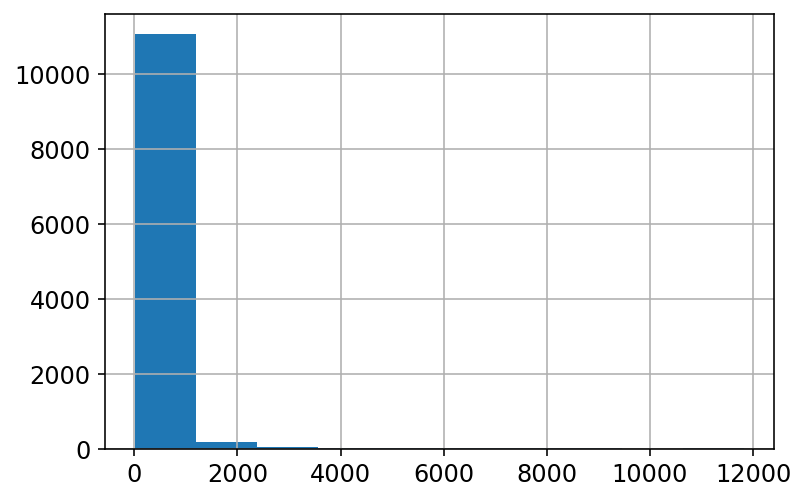

In [13]:
def get_words_per_doc(txt):
    # split text into words and count them.
    return len(txt.split()) 

# apply to our data
df['num_words'] = df['text'].apply(get_words_per_doc)
df['num_words'].hist()

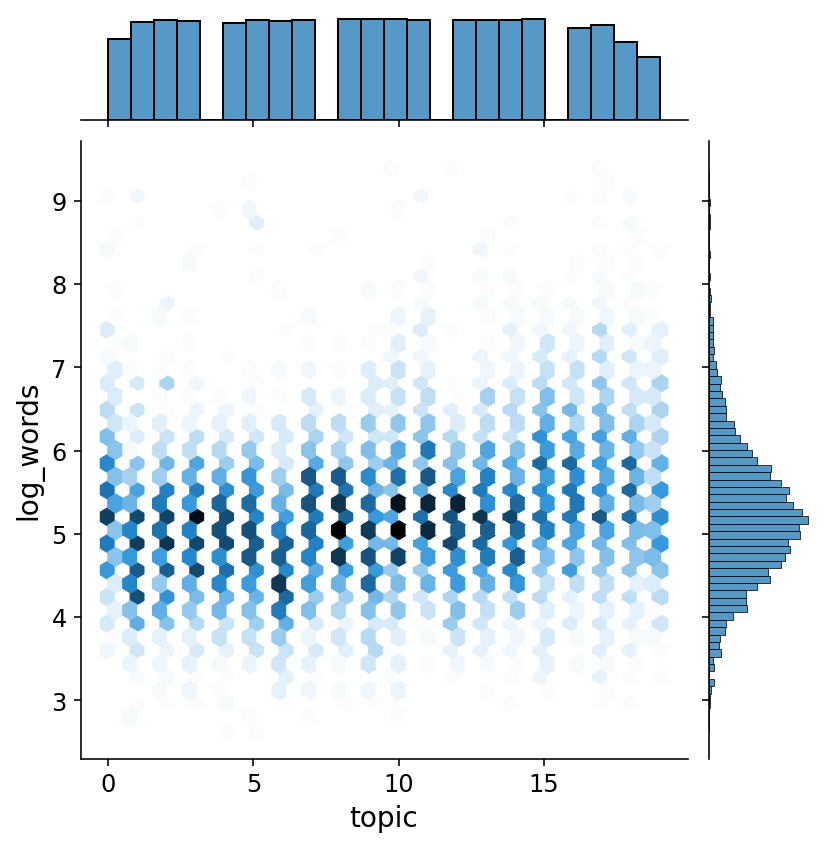

In [14]:
df['log_words'] = np.log(df['num_words'])
import seaborn as sns
sns.jointplot(data=df,x='topic', y='log_words',kind='hex')

Build a frequency distribution over words with `Counter`.

In [15]:
from collections import Counter
freqs = Counter()
for i, row in df.iterrows():
    freqs.update(row['text'].lower().split())
    if i > 100:
        break
freqs.most_common()[:20] # can use most frequent words as style/function words

[('the', 1357),
 ('of', 645),
 ('to', 578),
 ('and', 548),
 ('a', 532),
 ('in', 427),
 ('i', 370),
 ('is', 360),
 ('that', 300),
 ('for', 250),
 ('it', 193),
 ('on', 189),
 ('you', 173),
 ('have', 161),
 ('be', 158),
 ('-', 156),
 ('with', 156),
 ('this', 148),
 ('are', 142),
 ('>', 140)]

# Dictionary / Matching Methods

## Sentiment Analysis

In [16]:
# Dictionary-Based Sentiment Analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
polarity = sid.polarity_scores(doc)
print(polarity)

{'neg': 0.012, 'neu': 0.916, 'pos': 0.072, 'compound': 0.807}


In [17]:
# sample 20% of the dataset
dfs = df.sample(frac=.2) 

# apply compound sentiment score to data-frame
def get_sentiment(snippet):
    return sid.polarity_scores(snippet)['compound']
dfs['sentiment'] = dfs['text'].apply(get_sentiment)

In [18]:
dfs.sort_values('sentiment',inplace=True)
# print beginning of most positive documents
[x[50:150] for x  in dfs[-5:]['text']]

['p.windows.x Frequently Asked Questions (FAQ) 3/5\nSummary: useful information about the X Window Syst',
 '10 Medical Newsletter, Part 2/4\nReply-To: david@stat.com (David Dodell)\nDistribution: world\nOrganiza',
 '\nSubject: Final Public Dragon Magazine Update (Last chance for public bids)\nKeywords: Dragon Magazin',
 "\nSubject: CLINTON: President's Remarks at Town Hall Meeting\nOrganization: MIT Artificial Intelligenc",
 '\nSubject: CLINTON: Background BRiefing in Vancouver 4.4.93\nOrganization: Project GNU, Free Software ']

In [19]:
# print beginning of most negative documents
[x[50:150] for x  in dfs[:5]['text']]

['OSE OF FALKLANDS WAR\nOrganization: University of Wisconsin Eau Claire\nLines: 918\n\n\n\nSECRET PURPOSE O',
 'ct: Re: Need info on 43:1 and suicide for refutation\nOrganization: Ideology Busters, Inc.\nDistributi',
 ': Accounts of Anti-Armenian Human Rights Violations in Azerbaijan #013\nSummary: Prelude to Current E',
 'ews in LATVIA - some documents\nArticle-I.D.: zuma.9304052018\nReply-To: sera@zuma.UUCP (Serdar Argic)',
 ' e)\nSubject: Re: Sinus vs. Migraine (was Re: Sinus Endoscopy)\nOrganization: Bellcore, Livingston, NJ']

## StopWords

In [20]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [21]:
stopwords = set([x for x in stopwords if x != 'against']) # exception

In [22]:
stopfreq = np.sum([freqs[x] for x in stopwords])
stopfreq

10481

In [23]:
otherfreq = np.sum([freqs[x] for x in freqs if x not in stopwords])
otherfreq

18320

## RegEx

Please refer to [RegExOne Regular Expressions Lessons](regexone.com) and [the python documentation](https://docs.python.org/3/howto/regex.html).

In [24]:
import re

docs = dfs[:5]['text']

# Extract words after Subject.
for doc in docs:    
    print(re.findall(r'Subject: \w+ ', # pattern to match. always put 'r' in front of string so that backslashes are treated literally.
                     doc,            # string
                     re.IGNORECASE))  # ignore upper/lowercase (optional)

['Subject: SECRET ']
['Subject: Gun ']
['Subject: Accounts ']
[]
[]


In [25]:
# Extract hyphenated words
for doc in docs:    
    print(re.findall(r'[a-z]+-[a-z]+', 
                     doc,            
                     re.IGNORECASE))  

['IN-VISIBILITY', 'wind-swept', 'so-called', 'longer-range', 'so-called', 'two-thirds', 'semi-permanent', 'far-off', 'so-called', 'fast-approaching', 'so-called', 'up-to', 'anti-Bolshevik', 'long-range', 'two-prong', 'Rockefeller-controlled', 'full-fledged', 'all-out', 'so-called', 'then-President', 'over-all', 'so-called', 'particle-beam', 'man-made', 'then-Secretary', 'newly-launched', 'nuclear-powered', 'so-called', 'war-planes', 'Stealth-field', 'three-phase', 'war-room', 'all-out', 'anti-Bolshevik', 'anti-Bolshevik', 'so-called', 'slow-down', 'anti-Bolshevik', 'Rockefeller-Russian', 'mid-February', 'Bolshevik-controlled', 'long-standing', 'scrap-metal', 'work-site', 'year-old', 'long-standing', 'far-off', 'Rockefeller-Russian', 'high-speed', 'Rockefeller-Russian', 'Rockefeller-Russian', 'so-called', 'blast-proof', 'Rockefeller-Russian', 'mid-Atlantic', 'Rockefeller-Russian', 'hollowed-out', 'beam-weapon', 'Range-Finding', 'non-homing', 'non-nuclear', 'pseudo-smile', 'Rockefeller-R

In [26]:
# extract email addresses
for i, doc in enumerate(docs):
    finder = re.finditer('\w+@.+\.\w\w\w', # pattern to match ([^\s] means non-white-space)
                     doc)            # string
    for m in finder: 
        print(i, m.span(),m.group()) # location (start,end) and matching string

0 (6, 29) mcelwre@cnsvax.uwec.edu
0 (274, 291) eidetics@cerf.net
1 (6, 27) lvc@cbnews.cb.att.com
1 (11768, 11784) cipriani@att.com
2 (6, 25) dbd@urartu.sdpa.org
2 (21578, 21597) dbd@urartu.sdpa.org
3 (6, 19) sera@zuma.UUC
3 (121, 134) sera@zuma.UUC
3 (202, 249) 50D@unix.amherst.edu> nwbernst@unix.amherst.edu
4 (6, 33) jer@prefect.cc.bellcore.com


In [27]:
# baker-bloom economic uncertainty
pattern1 = r'(\b)uncertain[a-z]*'
pattern2 = r'(\b)econom[a-z]*'
pattern3 = r'(\b)congress(\b)|(\b)deficit(\b)|(\b)federal reserve(\b)|(\b)legislation(\b)|(\b)regulation(\b)|(\b)white house(\b)'

In [28]:
re.search(pattern1,'The White House tried to calm uncertainty in the markets.')

<re.Match object; span=(30, 41), match='uncertainty'>

In [29]:
def indicates_uncertainty(doc):
    m1 = re.search(pattern1, doc, re.IGNORECASE)
    m2 = re.search(pattern2, doc, re.IGNORECASE)
    m3 = re.search(pattern3, doc, re.IGNORECASE)
    if m1 and m2 and m3:
        return True
    else:
        return False

In [30]:
df['uncertainty'] = df['text'].apply(indicates_uncertainty)

In [31]:
df.uncertainty.mean()

0.00017677214071062401

In [32]:
df[df.uncertainty]

text  topic  num_words  \
2350  From: ld231782@longs.lance.colostate.edu (L. D...     11       8569   
4682  From: ld231782@longs.lance.colostate.edu (L. D...     11       8520   

      log_words  uncertainty  
2350   9.055906         True  
4682   9.050172         True

# Featurizing Texts

## Main

In [33]:
text = "Prof. Zurich hailed from Zurich. She got 3 M.A.'s from ETH."

**Sentence Tokenization**

**NLTK has a fast implementation that makes errors.**

In [34]:
from nltk import sent_tokenize
sentences = sent_tokenize(text) # split document into sentences
print(sentences)

['Prof. Zurich hailed from Zurich.', 'She got 3 M.A.', "'s from ETH."]


**spacy works better.**

**Install spacy and the English model if you have not already.**

In [35]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
sentences = list(doc.sents)
print(sentences)

[Prof. Zurich hailed from Zurich., She got 3 M.A.'s from ETH.]


**Removing capitalization.**

In [36]:
# Capitalization
text_lower = text.lower() # go to lower-case
text_lower

"prof. zurich hailed from zurich. she got 3 m.a.'s from eth."

In [37]:
#####
# Punctuation
#####

# recipe for fast punctuation removal
from string import punctuation
punc_remover = str.maketrans('','',punctuation) 
text_nopunc = text_lower.translate(punc_remover)
print(text_nopunc)

prof zurich hailed from zurich she got 3 mas from eth


In [38]:
# Tokens
tokens = text_nopunc.split() # splits a string on white space
print(tokens)

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', '3', 'mas', 'from', 'eth']


In [39]:
# Numbers
# remove numbers (keep if not a digit)
no_numbers = [t for t in tokens if not t.isdigit()]
# keep if not a digit, else replace with "#"
norm_numbers = [t if not t.isdigit() else '#' 
                for t in tokens ]
print(no_numbers )
print(norm_numbers)

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'mas', 'from', 'eth']
['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', '#', 'mas', 'from', 'eth']


In [40]:
# Stopwords
from nltk.corpus import stopwords
stoplist = stopwords.words('english') 
# keep if not a stopword
nostop = [t for t in norm_numbers if t not in stoplist]
print(nostop)

['prof', 'zurich', 'hailed', 'zurich', 'got', '#', 'mas', 'eth']


In [41]:
# scikit-learn stopwords
from sklearn.feature_extraction import stop_words
sorted(list(stop_words.ENGLISH_STOP_WORDS))[:10]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost']

In [42]:
# spacy stopwords
sorted(list(nlp.Defaults.stop_words))[:10]

["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across']

In [43]:
# Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') # snowball stemmer, english
# remake list of tokens, replace with stemmed versions
tokens_stemmed = [stemmer.stem(t) for t in ['tax','taxes','taxed','taxation']]
print(tokens_stemmed)

['tax', 'tax', 'tax', 'taxat']


In [44]:
stemmer = SnowballStemmer('german') # snowball stemmer, german
print(stemmer.stem("Autobahnen"))

autobahn


In [45]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
[wnl.lemmatize(c) for c in ['corporation', 'corporations', 'corporate']]

['corporation', 'corporation', 'corporate']

Let's wrap it into a recipe.

In [46]:
from string import punctuation
translator = str.maketrans('','',punctuation) 
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def normalize_text(doc):
    "Input doc and return clean list of tokens"
    doc = doc.replace('\r', ' ').replace('\n', ' ')
    lower = doc.lower() # all lower case
    nopunc = lower.translate(translator) # remove punctuation
    words = nopunc.split() # split into tokens
    nostop = [w for w in words if w not in stoplist] # remove stopwords
    no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
    stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
    return stemmed

And apply it to the corpus.

In [47]:
df['tokens_cleaned'] = df['text'].apply(normalize_text)
df['tokens_cleaned']

0        [lerxstwamumdedu, where, thing, subject, car, ...
1        [guykuocarsonuwashingtonedu, guy, kuo, subject...
2        [twillisececnpurdueedu, thoma, e, willi, subje...
3        [jgreenamb, joe, green, subject, weitek, p9000...
4        [jcmheadcfaharvardedu, jonathan, mcdowel, subj...
                               ...                        
11309    [jimzisfeinfactorycom, jim, zisfein, subject, ...
11310    [ebodinpearltuftsedu, subject, screen, death, ...
11311    [westesnetcomcom, est, subject, mount, cpu, co...
11312    [stevehcrlgw, steven, collin, subject, sphere,...
11313    [gunningccocaltechedu, kevin, j, gun, subject,...
Name: tokens_cleaned, Length: 11314, dtype: object

**Shortcut: `gensim.simple_preprocess`.**

In [48]:
from gensim.utils import simple_preprocess
print(simple_preprocess(text))

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'from', 'eth']


In [49]:
from collections import Counter
print(Counter(simple_preprocess(text)))

Counter({'zurich': 2, 'from': 2, 'prof': 1, 'hailed': 1, 'she': 1, 'got': 1, 'eth': 1})


Now let's `simple_preprocess` on the corpus.

In [50]:
df['tokens_simple'] = df['text'].apply(simple_preprocess)
df['tokens_simple']

0        [from, lerxst, wam, umd, edu, where, my, thing...
1        [from, guykuo, carson, washington, edu, guy, k...
2        [from, twillis, ec, ecn, purdue, edu, thomas, ...
3        [from, jgreen, amber, joe, green, subject, re,...
4        [from, jcm, head, cfa, harvard, edu, jonathan,...
                               ...                        
11309    [from, jim, zisfein, factory, com, jim, zisfei...
11310    [from, ebodin, pearl, tufts, edu, subject, scr...
11311    [from, westes, netcom, com, will, estes, subje...
11312    [from, steve, hcrlgw, steven, collins, subject...
11313    [from, gunning, cco, caltech, edu, kevin, gunn...
Name: tokens_simple, Length: 11314, dtype: object

**Tagging Parts of Speech**

In [51]:
text = 'Science cannot solve the ultimate mystery of nature. And that is because, in the last analysis, we ourselves are a part of the mystery that we are trying to solve.'

#nltk.download('averaged_perceptron_tagger')
from nltk.tag import perceptron 
from nltk import word_tokenize
tagger = perceptron.PerceptronTagger()
tokens = word_tokenize(text)
tagged_sentence = tagger.tag(tokens)
tagged_sentence

[('Science', 'NN'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('solve', 'VB'),
 ('the', 'DT'),
 ('ultimate', 'JJ'),
 ('mystery', 'NN'),
 ('of', 'IN'),
 ('nature', 'NN'),
 ('.', '.'),
 ('And', 'CC'),
 ('that', 'DT'),
 ('is', 'VBZ'),
 ('because', 'RB'),
 (',', ','),
 ('in', 'IN'),
 ('the', 'DT'),
 ('last', 'JJ'),
 ('analysis', 'NN'),
 (',', ','),
 ('we', 'PRP'),
 ('ourselves', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('part', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('mystery', 'NN'),
 ('that', 'IN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('trying', 'VBG'),
 ('to', 'TO'),
 ('solve', 'VB'),
 ('.', '.')]

Plot nouns and adjectives by topic

<AxesSubplot:xlabel='topic'>

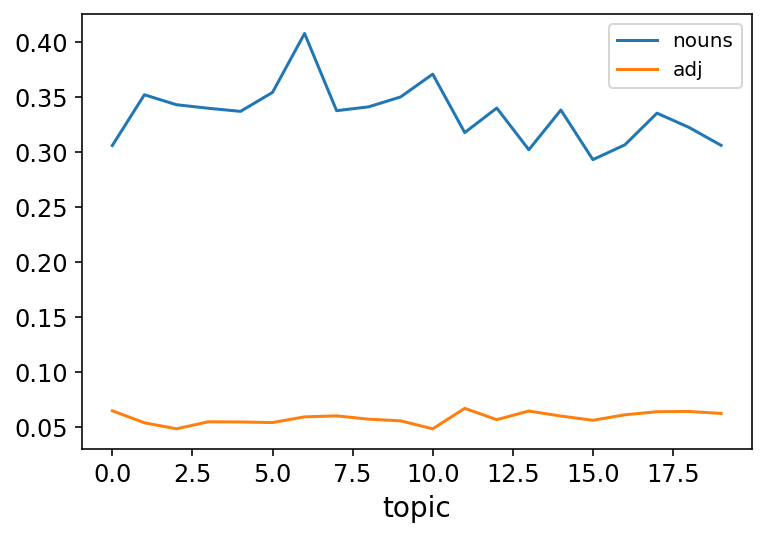

In [52]:
from collections import Counter
from nltk import word_tokenize

def get_nouns_adj(snippet):
    tags = [x[1] for x in tagger.tag(word_tokenize(snippet))]
    num_nouns = len([t for t in tags if t[0] == 'N']) / len(tags)
    num_adj = len([t for t in tags if t[0] == 'J']) / len(tags)
    return num_nouns, num_adj

dfs['nouns'], dfs['adj'] = zip(*dfs['text'].map(get_nouns_adj))
dfs.groupby('topic')[['nouns','adj']].mean().plot()

## Corpus Prep with spaCy

Get spacy documents for each speech and add to dataframe. This is quicker than iterating over the dataframe with `iterrows()`, but slower than a parallelized solution. It will take a few minutes for a whole corpus.

In [53]:
dfs = df.sample(10)
dfs['doc'] = dfs['text'].apply(nlp)

In [54]:
dfs.doc

6889     (From, :, wcd82671@uxa.cso.uiuc.edu, (, daniel...
9583     (From, :, dxf12@po.cwru.edu, (, Douglas, Fowle...
8321     (From, :, jebright@magnus.acs.ohio-state.edu, ...
5515     (From, :, ken@cs, ., UAlberta, ., CA, (, Huism...
6549     (From, :, pwb@aerg.canberra.edu.au, (, Paul, B...
9612     (From, :, royc@rbdc.wsnc.org, (, Roy, Crabtree...
2408     (From, :, aj@sage.cc.purdue.edu, (, John, Dorm...
5670     (From, :, edhall@rand.org, (, Ed, Hall, ), \n,...
8590     (From, :, grady@world.std.com, (, Dick, Grady,...
10326    (From, :, amanda@intercon.com, (, Amanda, Walk...
Name: doc, dtype: object

In [55]:
# The spacy model already gives you sentences and tokens.
# For example:
tensents = list(dfs['doc'].iloc[0].sents)[:10]
tensents

[From: wcd82671@uxa.cso.uiuc.edu (daniel warren c),
 Subject: Hard Copy --- Hot Pursuit!!!!,
 ,
 Summary: SHIT!!!!!!!,
 ,
 Keywords: Running from the Police.,
 ,
 Article-I.D.: news.,
 C5J34y.2t4
 Distribution: rec.motorcycles
 Organization: University of Illinois at Urbana
 Lines: 44
 
 
 Yo, did anybody see this run of HARD COPY?,
 
 
 I guy on a 600 Katana got pulled over by the Police (I guess for
 speeding or something).]

In [56]:
# tokens
list(tensents[-1]) 

[
 ,
 I,
 guy,
 on,
 a,
 600,
 Katana,
 got,
 pulled,
 over,
 by,
 the,
 Police,
 (,
 I,
 guess,
 for,
 ,
 speeding,
 or,
 something,
 ),
 .]

In [57]:
# lemmas
[x.lemma_ for x in tensents[-1]]

['\n\n',
 'I',
 'guy',
 'on',
 'a',
 '600',
 'Katana',
 'got',
 'pull',
 'over',
 'by',
 'the',
 'Police',
 '(',
 'I',
 'guess',
 'for',
 '\n',
 'speeding',
 'or',
 'something',
 ')',
 '.']

In [58]:
# POS tags
[x.tag_ for x in tensents[-1]]

['_SP',
 'PRP',
 'VBP',
 'IN',
 'DT',
 'CD',
 'NNP',
 'VBD',
 'VBN',
 'RP',
 'IN',
 'DT',
 'NNS',
 '-LRB-',
 'PRP',
 'VBP',
 'IN',
 '_SP',
 'NN',
 'CC',
 'NN',
 '-RRB-',
 '.']

## N-grams

In [59]:
from nltk import ngrams
from collections import Counter

# get n-gram counts for 10 documents
grams = []
for i, row in df.iterrows():
    tokens = row['text'].lower().split() # get tokens
    for n in range(2,4):
        grams += list(ngrams(tokens,n)) # get bigrams, trigrams, and quadgrams
    if i > 50:
        break
Counter(grams).most_common()[:8]  # most frequent n-grams

[(('of', 'the'), 41),
 (('subject:', 're:'), 37),
 (('in', 'the'), 33),
 (('to', 'the'), 27),
 (('i', 'am'), 21),
 (('i', 'have'), 21),
 (('to', 'be'), 19),
 (('on', 'the'), 18)]

In [60]:
# spacy NER noun chunks
i = 0
chunks = list(nlp(df['text'].iloc[10]).noun_chunks)
chunks

[irwin@cmptrc.lonestar.org,
 (Irwin Arnstein,
 Subject,
 Recommendation,
 Duc,
 What,
 it,
 usa,
 GMT
 Organization,
 CompuTrac Inc.,
 Richardson TX,
 Keywords: Ducati,
 GTS,
 Lines,
 I,
 a line,
 a Ducati 900GTS 1978 model,
 the clock,
 paint,
 the bronze/brown/orange,
 1st,
 hard accel,
 The shop,
 trans,
 oil 
 leak,
 They,
 the bike,
 the 1 and only owner,
 They,
 I,
 Any opinions,
 me,
 Thanks,
 It,
 a nice stable mate,
 the Beemer,
 I,
 a jap bike,
 myself,
 Axis Motors,
 I,
 I,
 "     CompuTrac-Richardson,
 irwin@cmptrc.lonestar.org    DoD,
 #,
 (R75/6]

## Tokenizers / Vectorizers

In [61]:
# Counter is a quick pure-python solution.
from collections import Counter
freqs = Counter(tokens)
freqs.most_common()[:20]

[('the', 13),
 ('sabbath', 6),
 ('to', 6),
 ('is', 6),
 ('that', 5),
 ('i', 4),
 ('one', 4),
 ('of', 4),
 ('have', 3),
 ('this', 3),
 ('on', 3),
 ('not', 3),
 ('been', 2),
 ('and', 2),
 ('with', 2),
 ('at', 2),
 ('argument', 2),
 ('those', 2),
 ('since', 2),
 ('a', 2)]

Usually we use scikit-learn's vectorizer.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.001, # at min 0.1% of docs
                        max_df=.8, # drop if shows up ih more than 80%  
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3)) # words, bigrams, and trigrams
X = vec.fit_transform(df['text'])

# save the vectors
# pd.to_pickle(X,'X.pkl')

# save the vectorizer 
# (so you can transform other documents, 
# also for the vocab)
#pd.to_pickle(vec, 'vec-3grams-1.pkl')

In [63]:
X

<11314x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 526707 stored elements in Compressed Sparse Row format>

In [64]:
# tf-idf vectorizer up-weights rare/distinctive words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.001, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(df['text'])
#pd.to_pickle(X_tfidf,'X_tfidf.pkl')

In [65]:
X_tfidf

<11314x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 521387 stored elements in Compressed Sparse Row format>

Make word cloud of common words by topic id.

In [66]:
df['topic'].value_counts() 

10    600
15    599
8     598
9     597
11    595
13    594
7     594
5     593
14    593
2     591
12    591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: topic, dtype: int64

In [67]:
vocab = tfidf.get_feature_names()
vocab[:10], vocab[-10:]

(['00', '000', '01', '02', '03', '04', '0d', '0t', '10', '100'],
 ['writes article',
  'written',
  'wrong',
  'wrote',
  'year',
  'years',
  'years ago',
  'yes',
  'york',
  'young'])

1


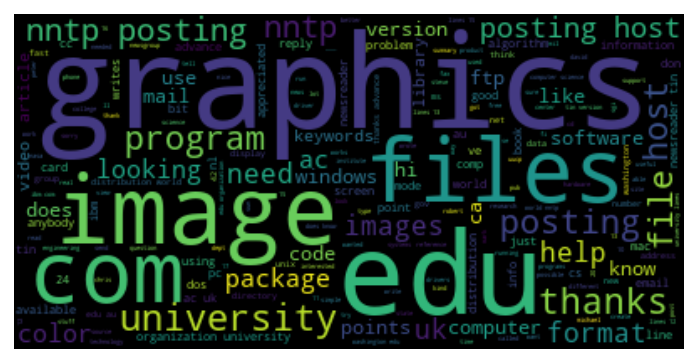

2


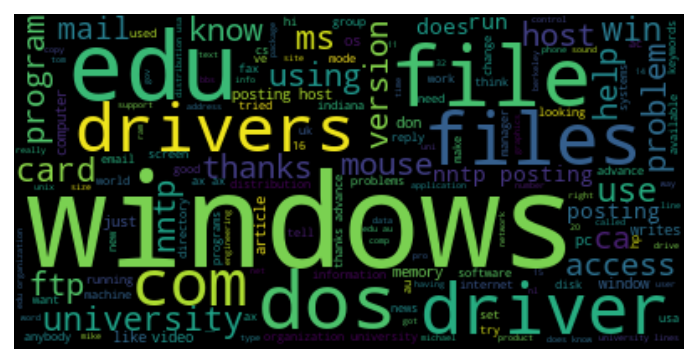

8


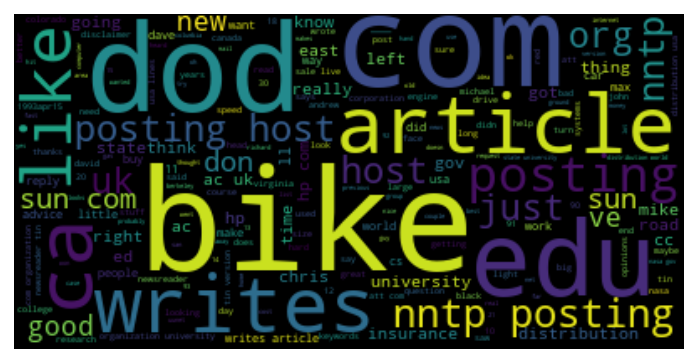

9


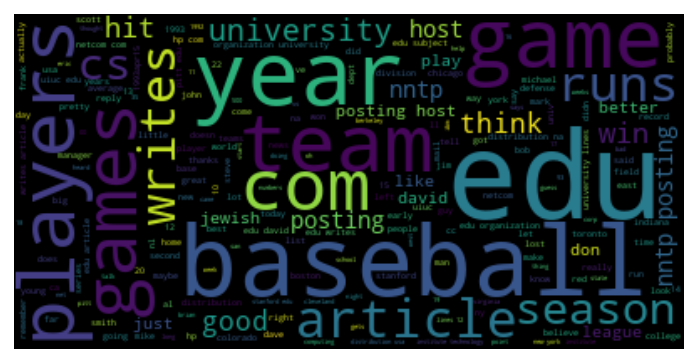

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_id in [1,2,8,9]: 
    slicer = df['topic'] == topic_id
    f = X_tfidf[slicer.values]
    total_freqs = list(np.array(f.sum(axis=0))[0])
    fdict = dict(zip(vocab,total_freqs))
    # generate word cloud of words with highest counts
    wordcloud = WordCloud().generate_from_frequencies(fdict) 
    print(topic_id)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.show()

In [69]:
# hash vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(n_features=10)
X_hash = hv.fit_transform(df['text'])
X_hash

<11314x10 sparse matrix of type '<class 'numpy.float64'>'
	with 112863 stored elements in Compressed Sparse Row format>

## Feature Selection

In [70]:
#%% Univariate feature selection using chi2
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, f_classif, mutual_info_classif
select = SelectKBest(chi2, k=10)
Y = df['topic']==1
X_new = select.fit_transform(X, Y)
# top 10 features by chi-squared:
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['friend',
 'pub',
 'file',
 'cmu edu',
 'form',
 'image',
 'away',
 'avoid',
 'ii',
 'government']

In [71]:
#%% top 10 features by  ANOVA F-value:
select = SelectKBest(f_classif, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['version',
 'cmu edu',
 'thanks',
 'points',
 'file',
 'level',
 'form',
 'ii',
 'image',
 'government']

In [72]:
#%% top 10 features by linear regression
select = SelectKBest(f_regression, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['version',
 'cmu edu',
 'thanks',
 'points',
 'file',
 'level',
 'form',
 'ii',
 'image',
 'government']

In [73]:
#%% top 10 features by mutual information (classification)
select = SelectKBest(mutual_info_classif, k=10)
select.fit(X[:1000], Y[:1000])
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['algorithm',
 'info',
 'use',
 'digex',
 'file',
 'close',
 'image',
 'figure',
 'ii',
 'government']

# Document Distance

In [74]:
# compute pair-wise similarities between all documents in corpus"
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(X[:100])
sim.shape

(100, 100)

In [75]:
sim[:4,:4]

array([[1.        , 0.20384233, 0.15095711, 0.19219753],
       [0.20384233, 1.        , 0.12569587, 0.1608558 ],
       [0.15095711, 0.12569587, 1.        , 0.16531366],
       [0.19219753, 0.1608558 , 0.16531366, 1.        ]])

In [76]:
# TF-IDF Similarity
tsim = cosine_similarity(X_tfidf[:100])
tsim[:4,:4]

array([[1.        , 0.05129256, 0.08901433, 0.06064389],
       [0.05129256, 1.        , 0.07497709, 0.03570566],
       [0.08901433, 0.07497709, 1.        , 0.09077347],
       [0.06064389, 0.03570566, 0.09077347, 1.        ]])

In [77]:
11000*11000

121000000

# Topic models

We use as an example the **20 Newsgroups** ([[http://qwone.com/~jason/20Newsgroups/]]) dataset (from `sklearn`), a collection of about 20,000 newsgroup (message forum) documents. 
Cf. Week 4 on introduction to text analysis. 

In [78]:
W=data.data

In [79]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords.add('edu')

Pre-processing

In [80]:
from gensim.utils import simple_preprocess

doc_clean = []
# iterate over rows
for i, text in enumerate(W):
    document = simple_preprocess(text) # get sentences/tokens
    document = [word for word in document if word not in stopwords] # remove stopwords
    doc_clean.append(document) # add to list
    if i > 100:
        break

In [81]:
# shuffle the documents
from random import shuffle
shuffle(doc_clean)

# creating the term dictionary
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)

Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.

In [82]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

TF-IDF matrix

In [83]:
from gensim.models import TfidfModel
tfidf = TfidfModel(doc_term_matrix)  # fit model

In [84]:
vector = tfidf[doc_term_matrix[0]]  # apply model to the first corpus document
vector

[(0, 0.018227372666022812),
 (1, 0.0683427471806827),
 (2, 0.08296957204758278),
 (3, 0.19519279382896565),
 (4, 0.049007136450130405),
 (5, 0.08296957204758278),
 (6, 0.09759639691448282),
 (7, 0.08296957204758278),
 (8, 0.046995896489658476),
 (9, 0.05653370813031638),
 (10, 0.09759639691448282),
 (11, 0.08296957204758278),
 (12, 0.05026447025242308),
 (13, 0.08296957204758278),
 (14, 0.08296957204758278),
 (15, 0.09759639691448282),
 (16, 0.12726792263406095),
 (17, 0.09759639691448282),
 (18, 0.08296957204758278),
 (19, 0.24890871614274832),
 (20, 0.06363396131703047),
 (21, 0.09759639691448282),
 (22, 0.3720671399791526),
 (23, 0.1366854943613654),
 (24, 0.03546270512805725),
 (25, 0.05123045907717819),
 (26, 0.08296957204758278),
 (27, 0.09759639691448282),
 (28, 0.02804749015852588),
 (29, 0.04515977826203039),
 (30, 0.043470713226712046),
 (31, 0.09759639691448282),
 (32, 0.05978660312893046),
 (33, 0.09759639691448282),
 (34, 0.09759639691448282),
 (35, 0.06363396131703047),
 

In [85]:
corpus_tfidf = tfidf[doc_term_matrix]   # apply model to whole corpus


Parameters of LDA

    num_topics
        specify how many topics you would like to extract from the documents

    alpha
        document-topic density
            the greater, the article will be assigned to more topics, vice versa

    eta
        topic-word density
            the greater, each topic will contain more words, vice versa


#### Using the DTM

In [154]:
# train LDA with 10 topics and print 
from gensim.models.ldamodel import LdaModel

lda = LdaModel(doc_term_matrix, num_topics=10, 
               id2word = dictionary, passes=3)
lda.show_topics(formatted=False)

[(0,
  [('subject', 0.0056453324),
   ('lines', 0.005614928),
   ('article', 0.005251016),
   ('organization', 0.005046897),
   ('weapons', 0.0047102678),
   ('reserve', 0.004258432),
   ('would', 0.004000198),
   ('tiff', 0.0038758405),
   ('writes', 0.0038665854),
   ('com', 0.0032654856)]),
 (1,
  [('subject', 0.005408539),
   ('may', 0.0052334117),
   ('lines', 0.0050862557),
   ('one', 0.0048042224),
   ('organization', 0.004723653),
   ('moral', 0.003691824),
   ('posting', 0.0034821047),
   ('think', 0.003359898),
   ('use', 0.003351918),
   ('article', 0.0032555368)]),
 (2,
  [('hijaak', 0.0039903834),
   ('lines', 0.0032854776),
   ('ac', 0.0030713896),
   ('tmc', 0.0030295986),
   ('organization', 0.0030020997),
   ('one', 0.0028716666),
   ('subject', 0.0026378708),
   ('use', 0.0026166786),
   ('know', 0.0024837065),
   ('university', 0.0024338798)]),
 (3,
  [('com', 0.0063451566),
   ('lines', 0.0057953047),
   ('subject', 0.005666338),
   ('would', 0.005658755),
   ('orga

In [87]:
lda_idf = LdaModel(corpus_tfidf, num_topics=10, 
               id2word = dictionary, passes=3)
lda_idf.show_topics(formatted=False)

[(0,
  [('tiff', 0.001185028),
   ('ncube', 0.0010645775),
   ('suresh', 0.0010206754),
   ('starters', 0.0009675925),
   ('blakey', 0.00087436876),
   ('lefthanded', 0.0007248857),
   ('code', 0.000705893),
   ('pa', 0.00070561783),
   ('windows', 0.00070067385),
   ('stereo', 0.0006921279)]),
 (1,
  [('simms', 0.00087112404),
   ('revolver', 0.0008632694),
   ('rushdie', 0.0007805448),
   ('oracle', 0.00077633513),
   ('hammerl', 0.0007453976),
   ('buffalo', 0.0007175823),
   ('olson', 0.0006893336),
   ('brandeis', 0.0006870727),
   ('branham', 0.0006870602),
   ('gpf', 0.0006870154)]),
 (2,
  [('catalog', 0.0010134903),
   ('captain', 0.00081981975),
   ('callison', 0.0008180895),
   ('traded', 0.00080653443),
   ('mfc', 0.00078348443),
   ('failed', 0.00074569567),
   ('cerkoney', 0.0007424971),
   ('ericsson', 0.0007118217),
   ('segment', 0.00067214103),
   ('ncd', 0.00066054513)]),
 (3,
  [('reserve', 0.0010118006),
   ('sabbath', 0.0010020122),
   ('kaldis', 0.0009750766),
  

In [88]:
# to get the topic proportions for a document, use
# the corresponding row from the document-term matrix.
lda[doc_term_matrix[0]]

[(3, 0.9915071)]

The wordcloud package builds a visual representation of most common words. We apply it by topic here

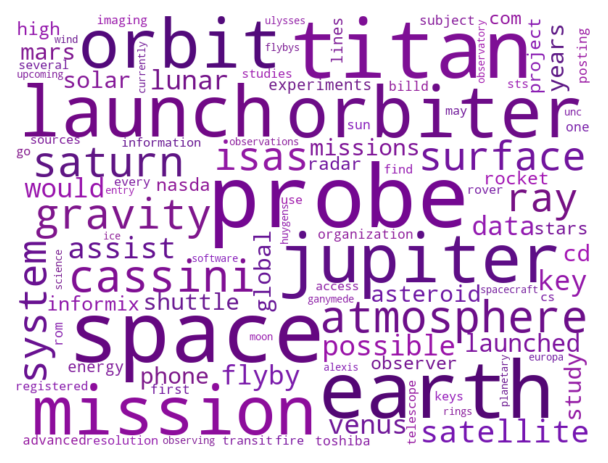

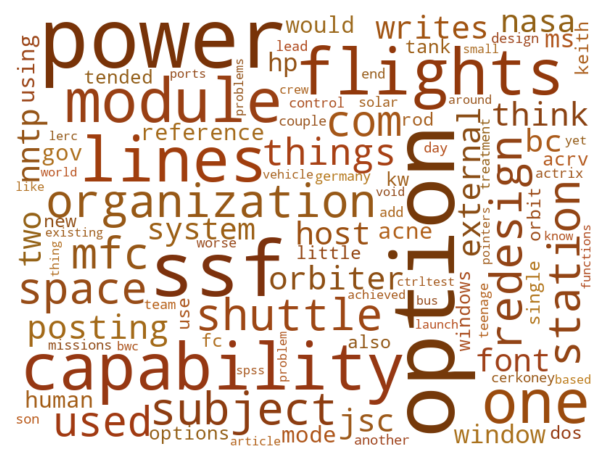

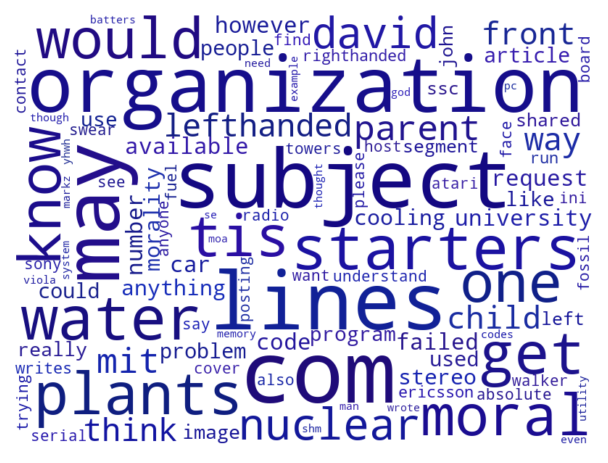

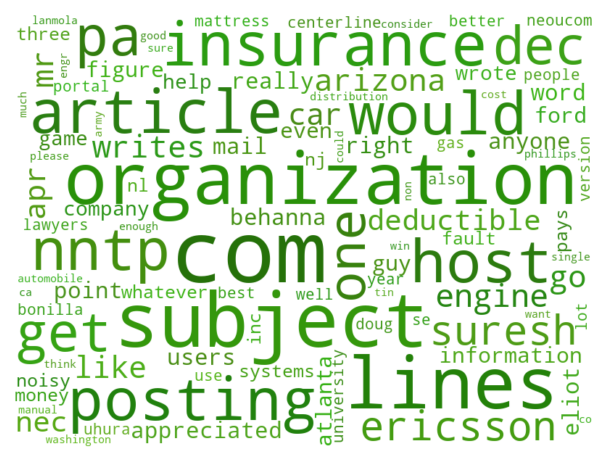

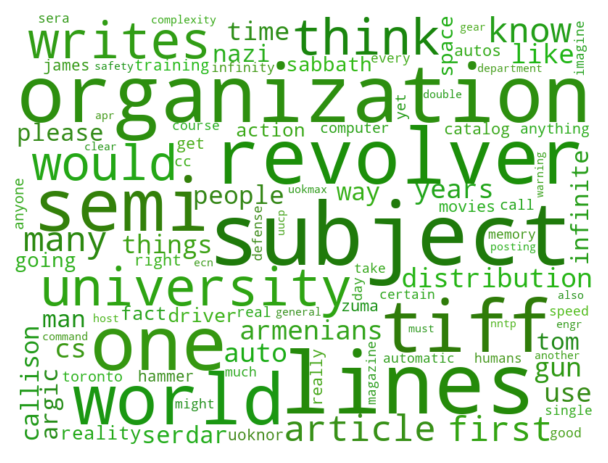

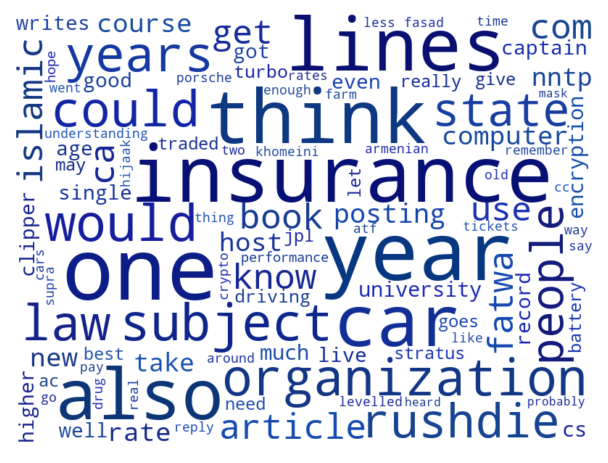

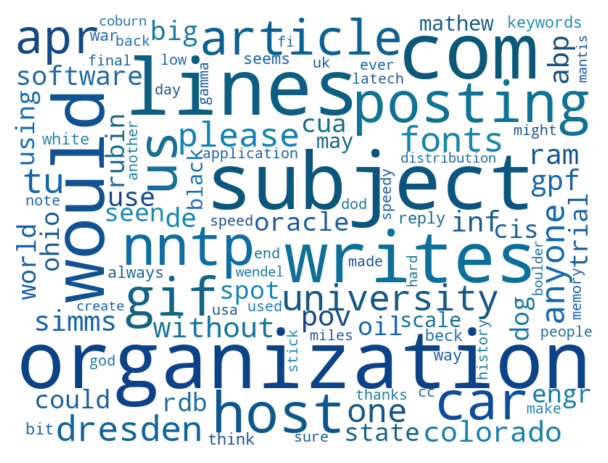

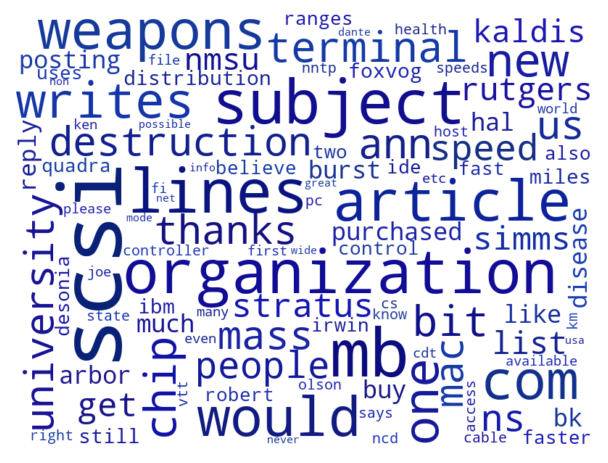

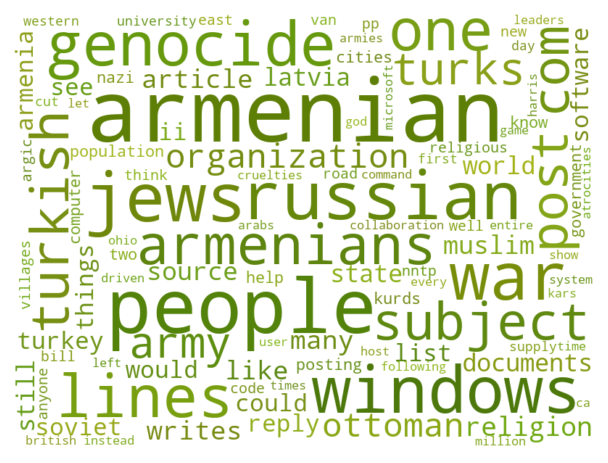

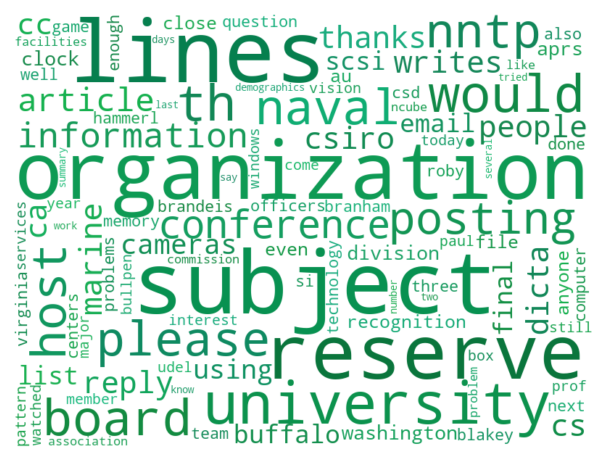

In [89]:
###
# LDA Word Clouds
###

from numpy.random import randint
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# make directory if not exists
from os import mkdir
try:
    mkdir('lda')
except:
    pass

# make word clouds for the topics
for i,weights in lda.show_topics(num_topics=-1,
                                 num_words=100,
                                 formatted=False):
    
    #logweights = [w[0], np.log(w[1]) for w in weights]
    maincol = randint(0,360)
    def colorfunc(word=None, font_size=None, 
                  position=None, orientation=None, 
                  font_path=None, random_state=None):   
        color = randint(maincol-10, maincol+10)
        if color < 0:
            color = 360 + color
        return "hsl(%d, %d%%, %d%%)" % (color,randint(65, 75)+font_size / 7, randint(35, 45)-font_size / 10)   

    
    wordcloud = WordCloud(background_color="white", 
                          ranks_only=False, 
                          max_font_size=120,
                          color_func=colorfunc,
                          height=600,width=800).generate_from_frequencies(dict(weights))

    plt.clf()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

**LDAvis viz**

# Word Embeddings

In [90]:

def get_sentences(doc):
    sentences = []
    
    for raw in sent_tokenize(doc):
        raw2 = [i for i in raw.translate(translator).lower().split() if i not in stop and len(i) < 10]
        raw3 = [stemmer.stem(t) for t in raw2]
        sentences.append(raw3)
    return sentences

In [91]:
###
# Word2Vec in gensim
###

# word2vec requires sentences as input
sentences = []
for doc in df['text']:
    sentences += [simple_preprocess(doc)]
from random import shuffle
shuffle(sentences) # stream in sentences in random order

# train the model
from gensim.models import Word2Vec
w2v = Word2Vec(sentences,  # list of tokenized sentences
               workers = 8, # Number of threads to run in parallel
               size=300,  # Word vector dimensionality     
               min_count =  25, # Minimum word count  
               window = 5, # Context window size      
               sample = 1e-3, # Downsample setting for frequent words
               )

# done training, so delete context vectors
w2v.init_sims(replace=True)

w2v.save('w2v-vectors.pkl')

In [92]:
w2v.wv.most_similar('man') # most similar words

[('christ', 0.7512136697769165),
 ('woman', 0.7265682220458984),
 ('jesus', 0.7187944650650024),
 ('satan', 0.6972118616104126),
 ('lord', 0.6948500275611877),
 ('god', 0.6891006231307983),
 ('himself', 0.6871961951255798),
 ('son', 0.6849521398544312),
 ('spirit', 0.683222770690918),
 ('judas', 0.6718069314956665)]

In [93]:
# analogies: judge is to man as __ is to woman
w2v.wv.most_similar(positive=['judge','man'],
                 negative=['woman'])

[('god', 0.6385816335678101),
 ('accept', 0.5874378085136414),
 ('lord', 0.5739627480506897),
 ('pray', 0.5711130499839783),
 ('christ', 0.5590704679489136),
 ('obey', 0.5548884868621826),
 ('praise', 0.5445881485939026),
 ('jesus', 0.5254360437393188),
 ('promise', 0.5182420611381531),
 ('sin', 0.5176558494567871)]

In [94]:
# Word2Vec: K-Means Clusters
from sklearn.cluster import KMeans
kmw = KMeans(n_clusters=50)
kmw.fit(w2v.wv.vectors)

KMeans(n_clusters=50)

In [95]:
clust = kmw.labels_[w2v.wv.vocab['woman'].index]
for i, cluster in enumerate(kmw.labels_):
    if cluster == clust:
        print(w2v.wv.index2word[i])
    if i > 1000:
        break

had
got
her
left
home
came
went
later
started
took
saw
head
dead
goes
fire
hit
face
gets
coming
behind
taking
near
sent


In [158]:
###
# Pre-trained vectors
###

import spacy
en = spacy.load('en_core_web_lg') # higher-quality vectors (but 800MB)
apple = en('apple') 
apple.vector[:10] # vector for 'apple'

array([-0.36391 ,  0.43771 , -0.20447 , -0.22889 , -0.14227 ,  0.27396 ,
       -0.011435, -0.18578 ,  0.37361 ,  0.75339 ], dtype=float32)

In [159]:
apple.similarity(apple)

1.0

In [166]:
orange = en('orange')
apple.similarity(orange)

0.5618917538704213

# Document Embeddings

In [99]:
###
# Make document vectors from word embeddings
##

# Continuous bag-of-words representation
from gensim.models import Word2Vec
w2v = Word2Vec.load('w2v-vectors.pkl')

sentvecs = []
for sentence in sentences:
    vecs = [w2v.wv[w] for w in sentence if w in w2v.wv]
    if len(vecs)== 0:
        sentvecs.append(np.nan)
        continue
    sentvec = np.mean(vecs,axis=0)
    sentvecs.append(sentvec.reshape(1,-1))
sentvecs[0][0][:30]

array([-0.04867719, -0.03798513, -0.03023835,  0.02775037, -0.00031064,
       -0.00890509,  0.02321273, -0.06219319,  0.0151516 , -0.00389844,
       -0.0052097 , -0.01658486, -0.00086601,  0.00924505,  0.01316522,
        0.02467314, -0.00054178, -0.00823252, -0.00263689,  0.02137691,
       -0.01366158,  0.00199893, -0.0083484 , -0.00463704,  0.0050037 ,
       -0.01786202, -0.02358272,  0.00098097,  0.02329167, -0.01449622],
      dtype=float32)

In [100]:
# compute cosine similarity between sentence vectors
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(sentvecs[0],
                  sentvecs[1])[0][0]

0.06100362

In [101]:
sentvecs[0]

array([[-0.04867719, -0.03798513, -0.03023835,  0.02775037, -0.00031064,
        -0.00890509,  0.02321273, -0.06219319,  0.0151516 , -0.00389844,
        -0.0052097 , -0.01658486, -0.00086601,  0.00924505,  0.01316522,
         0.02467314, -0.00054178, -0.00823252, -0.00263689,  0.02137691,
        -0.01366158,  0.00199893, -0.0083484 , -0.00463704,  0.0050037 ,
        -0.01786202, -0.02358272,  0.00098097,  0.02329167, -0.01449622,
         0.0114322 ,  0.00360733,  0.02259501,  0.01096252,  0.0160067 ,
        -0.0316385 ,  0.01442849,  0.02037092, -0.02021442,  0.02763616,
        -0.00584518, -0.01640858,  0.00917802,  0.00148533, -0.0133746 ,
         0.01892362, -0.0177224 , -0.03114796,  0.05251757, -0.00482338,
        -0.04236708, -0.02596961, -0.00521385,  0.00579874,  0.02869034,
         0.00465122,  0.02630986,  0.01740259,  0.03142818,  0.01890142,
        -0.03195403,  0.00869448,  0.00396098, -0.0115144 , -0.04446824,
         0.00553169,  0.00620845, -0.01203891,  0.0

In [102]:
###
# Doc2Vec
###

from nltk import word_tokenize
docs = []

for i, row in df.iterrows():
    docs += [word_tokenize(row['text'])]
shuffle(docs)

In [103]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
doc_iterator = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs)]
d2v = Doc2Vec(doc_iterator,
                min_count=10, # minimum word count
                window=10,    # window size
                vector_size=200, # size of document vector
                sample=1e-4, 
                negative=5, 
                workers=4, # threads
                #dbow_words = 1 # uncomment to get word vectors too
                max_vocab_size=1000) # max vocab size

In [104]:
d2v.save('d2v-vectors.pkl')

In [105]:
# matrix of all document vectors:
D = d2v.docvecs.vectors_docs
D.shape

(11314, 200)

In [106]:
D

array([[-0.01393391, -0.01153701,  0.01474643, ..., -0.00225788,
         0.0104891 ,  0.01703974],
       [-0.03794911, -0.01326772,  0.00825495, ..., -0.02458286,
         0.00471963,  0.00418365],
       [-0.00033291,  0.02208605, -0.00788431, ..., -0.00724108,
         0.0008951 ,  0.01451188],
       ...,
       [-0.02634222, -0.01171288,  0.01918605, ..., -0.00480364,
         0.01683691,  0.03526947],
       [ 0.02744871, -0.00721174, -0.01328694, ...,  0.00634127,
        -0.0138753 , -0.01091709],
       [-0.01769377,  0.00119136,  0.00976941, ..., -0.00996774,
         0.00043655,  0.0243091 ]], dtype=float32)

In [108]:
# infer vectors for new documents
d2v.infer_vector(['the judge on the court'])[:20]

array([-0.00064122,  0.00024823, -0.00013868, -0.00096649, -0.00196117,
       -0.00203372,  0.00171281,  0.00109255,  0.00047013,  0.00092531,
       -0.00075817, -0.00090291, -0.00202117,  0.00170648, -0.00152676,
       -0.0007864 , -0.00174724,  0.00206965, -0.00247966,  0.00055404],
      dtype=float32)

In [109]:
# get all pair-wise document similarities
pairwise_sims = cosine_similarity(D)
pairwise_sims.shape

(11314, 11314)

In [110]:
pairwise_sims[:3,:3]

array([[1.0000001 , 0.7214666 , 0.52836025],
       [0.7214666 , 0.9999998 , 0.622236  ],
       [0.52836025, 0.622236  , 1.0000002 ]], dtype=float32)

In [128]:
# Document clusters
from sklearn.cluster import KMeans

# create 50 clusters of similar documents
num_clusters = 10
kmw = KMeans(n_clusters=num_clusters)
kmw.fit(D)

KMeans(n_clusters=10)

In [132]:
# Documents from an example cluster
for i, doc in enumerate(docs):
    if kmw.labels_[i] == 3:
        print(doc[10:20])
    if i == 20000:
        break

[':', 'Accounts', 'of', 'Anti-Armenian', 'Human', 'Rights', 'Violations', 'in', 'Azerbaijan', '#']
[':', 'CLINTON', ':', 'Press', 'Briefing', 'by', 'George', 'Stephanopoulos', '4.15.93', 'Organization']
[':', 'CLINTON', ':', 'Press', 'Briefing', 'by', 'George', 'Stephanopoulos', '4.5.93', 'Organization']
[':', 'Accounts', 'of', 'Anti-Armenian', 'Human', 'Rights', 'Violations', 'in', 'Azerbaijan', '#']
[':', 'Accounts', 'of', 'Anti-Armenian', 'Human', 'Right', 'Violations', 'in', 'Azerbaijan', '#']
[':', 'Accounts', 'of', 'Anti-Armenian', 'Human', 'Right', 'Violations', 'in', 'Azerbaijan', '#']
[':', 'CLINTON', ':', 'Press', 'Briefing', 'by', 'George', 'Stephanopoulos', '4.14.93', 'Organization']
[':', 'Accounts', 'of', 'Anti-Armenian', 'Human', 'Right', 'Violations', 'in', 'Azerbaijan', '#']
[':', 'Nostalgia', 'Organization', ':', 'Tektronix', 'Inc.', ',', 'Beaverton', ',', 'Or']
[':', 'CLINTON', ':', 'AM', 'Press', 'Briefing', 'by', 'Dee', 'Dee', 'Myers']
[':', 'CLINTON', ':', 'Backgr

In [113]:
# t-SNE for visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
d2v_tsne = tsne.fit_transform(D)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 11314 samples in 0.321s...
[t-SNE] Computed neighbors for 11314 samples in 40.065s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11314
[t-SNE] Computed conditional probabilities for sample 2000 / 11314
[t-SNE] Computed conditional probabilities for sample 3000 / 11314
[t-SNE] Computed conditional probabilities for sample 4000 / 11314
[t-SNE] Computed conditional probabilities for sample 5000 / 11314
[t-SNE] Computed conditional probabilities for sample 6000 / 11314
[t-SNE] Computed conditional probabilities for sample 7000 / 11314
[t-SNE] Computed conditional probabilities for sample 8000 / 11314
[t-SNE] Computed conditional probabilities for sample 9000 / 11314
[t-SNE] Computed conditional probabilities for sample 10000 / 11314
[t-SNE] Computed conditional probabilities for sample 11000 / 11314
[t-SNE] Computed conditional probabilities for sample 11314 / 11314
[t-SNE] Mean sigma: 0.030398
[t-SNE] KL divergen

In [133]:
vdf = pd.DataFrame(d2v_tsne,
                  columns=['x-tsne', 'y-tsne'])
vdf['cluster'] = kmw.labels_

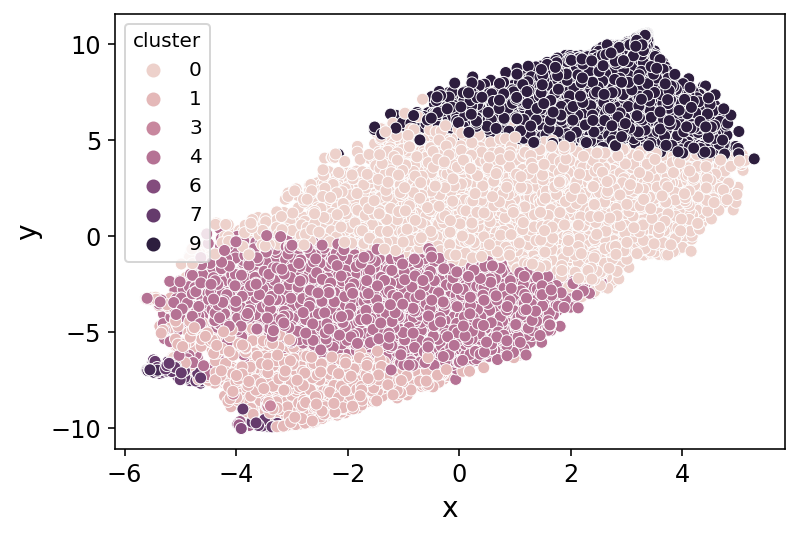

In [139]:
import seaborn as sns
vdf = pd.DataFrame(d2v_tsne,
                  columns=['x', 'y'])
vdf['cluster'] = kmw.labels_

chart = sns.scatterplot(data=vdf, x='x', y='y', hue='cluster')

# Dependency Parsing

In [141]:
text = 'Science cannot solve the ultimate mystery of nature. And that is because, in the last analysis, we ourselves are a part of the mystery that we are trying to solve.'
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

In [142]:
doc

Science cannot solve the ultimate mystery of nature. And that is because, in the last analysis, we ourselves are a part of the mystery that we are trying to solve.

In [143]:
for sent in doc.sents:
    print(sent)
    print(sent.root)
    print([(w, w.dep_) for w in sent.root.children])
    print()

Science cannot solve the ultimate mystery of nature.
solve
[(Science, 'nsubj'), (can, 'aux'), (not, 'neg'), (mystery, 'dobj'), (., 'punct')]

And that is because, in the last analysis, we ourselves are a part of the mystery that we are trying to solve.
is
[(And, 'cc'), (that, 'nsubj'), (are, 'advcl'), (., 'punct')]



In [144]:
sent

And that is because, in the last analysis, we ourselves are a part of the mystery that we are trying to solve.

In [145]:
# Noun Phrase Chunking
list(doc.noun_chunks)

[Science,
 the ultimate mystery,
 nature,
 the last analysis,
 we,
 ourselves,
 a part,
 the mystery,
 we]

In [146]:
sent.root

is

In [147]:
list(sent.root.children)

[And, that, are, .]

In [148]:
# Left children
list(sent.root.lefts)

[And, that]

In [149]:
# Right children
list(sent.root.rights)

[are, .]

In [150]:
sent[0]

And

In [151]:
sent[0].dep_

'cc'

In [152]:
sent[0].head

is